In [2]:
import os
import seaborn as sns
from scipy.spatial import distance as dist
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import imutils
import numpy as np
from PIL import Image
from shared_astro_utils.matching_utils import match_galaxies_to_catalog_pandas
from imutils import contours

from astropy.cosmology import FlatLambdaCDM
import numpy as np
from astropy import units as u
cosmo = FlatLambdaCDM(H0=67.8, Om0=0.308)


In [3]:
bar_df = pd.read_csv('/Users/user/Downloads/hoyle_barlengths.csv')

In [4]:
bar_df

,objid,ra,dec,length_avg,length_stdev,width_avg,width_stdev,length_scaled,bar_meas
0,587722981747982465,198.05199,-1.095136,5.841887,0.320314,2.328472,0.951038,0.461109,3
1,587722981752438860,208.22692,-1.114616,3.240697,0.741893,0.603216,0.197862,0.339584,4
2,587722982286426253,201.59344,-0.816576,5.171054,0.606520,1.434728,0.117809,0.406783,3
3,587722982290686153,211.35525,-0.811344,10.311853,2.352807,3.483071,1.954910,0.428145,4
4,587722982292521047,215.52468,-0.669283,11.513937,3.133255,2.497071,1.021334,0.439008,4
...,...,...,...,...,...,...,...,...,...
3145,588848901005246604,223.04204,0.783986,6.470187,1.389767,1.569311,1.105357,0.493286,4
3146,588848901007933476,229.10432,0.708052,6.125565,1.280630,1.590883,1.110799,0.316473,4
3147,588848901523636294,180.87304,1.229350,4.699296,0.352203,1.425113,0.689318,0.341577,5
3148,588848901525930026,186.02036,1.189801,5.349061,1.345254,1.002916,0.550130,0.366885,4


In [5]:
on_local = os.path.isdir('/Users/user/')
if on_local:
    base_dir = '/Users/user/repos/zoobot-3d/'
else:
    base_dir = '/share/nas2/walml/galaxy_zoo/segmentation/'

df = pd.read_parquet(base_dir + 'data/test_catalog.parquet')

df['spiral_mask_exists'] = df['spiral_mask_loc'].apply(os.path.isfile)
assert any(df['spiral_mask_exists'])
df = df.query('spiral_mask_exists').reset_index(drop=True)
df['spiral_mask_loc'] = ''

checkpoint_path = base_dir + 'outputs/run_1695899881.3925836/epoch=93-step=1880.ckpt'
# checkpoint_path = base_dir + 'outputs/run_1695938854.2480044/epoch=91-step=1840.ckpt'
save_dir = os.path.dirname(checkpoint_path) + '/predictions/'
df['zoobot_bar_mask_loc'] = df['dr8_id'].apply(lambda x: save_dir + f'/{x}_bar_pred_viz.png')

In [6]:
matched, _ = match_galaxies_to_catalog_pandas(bar_df, df)
len(matched)

140

In [7]:
matched

,objid_subject,ra_subject,dec_subject,length_avg,length_stdev,width_avg,width_stdev,length_scaled,bar_meas,best_match,...,spiral-arm-count-gz2_2_fraction,spiral-arm-count-gz2_3_fraction,spiral-arm-count-gz2_4_fraction,spiral-arm-count-gz2_more-than-4_fraction,spiral-arm-count-gz2_cant-tell_fraction,spiral_mask_loc,bar_mask_loc,desi_jpg_loc,spiral_mask_exists,zoobot_bar_mask_loc
0,587722983365738669,214.34239,0.023694,15.036582,1.080868,4.491394,0.957106,0.495502,3,135,...,0.542857,0.028571,0.085714,0.000000,0.200000,,/Users/user/repos/zoobot-3d/data/gz3d/segmaps/...,/Users/user/repos/zoobot-3d/data/desi/jpg/3312...,True,/Users/user/repos/zoobot-3d/outputs/run_169589...
1,587722983901888787,212.79369,0.578789,18.317577,0.768186,3.924386,1.546539,0.519469,5,764,...,0.878788,0.060606,0.030303,0.000000,0.030303,,/Users/user/repos/zoobot-3d/data/gz3d/segmaps/...,/Users/user/repos/zoobot-3d/data/desi/jpg/3340...,True,/Users/user/repos/zoobot-3d/outputs/run_169589...
2,587725040092250278,180.79454,-2.876003,10.530710,2.627355,5.154389,0.718486,0.367860,4,536,...,0.818182,0.000000,0.000000,0.000000,0.181818,,/Users/user/repos/zoobot-3d/data/gz3d/segmaps/...,/Users/user/repos/zoobot-3d/data/desi/jpg/3138...,True,/Users/user/repos/zoobot-3d/outputs/run_169589...
3,587725470129717308,123.57119,46.010307,11.454425,2.337946,1.968308,1.181326,0.370808,4,9,...,0.833333,0.000000,0.055556,0.027778,0.083333,,/Users/user/repos/zoobot-3d/data/gz3d/segmaps/...,/Users/user/repos/zoobot-3d/data/desi/jpg/5687...,True,/Users/user/repos/zoobot-3d/outputs/run_169589...
4,587725470129782832,123.82029,46.075246,18.970255,0.943524,4.337632,4.004719,0.732343,5,1024,...,0.974359,0.000000,0.000000,0.000000,0.025641,,/Users/user/repos/zoobot-3d/data/gz3d/segmaps/...,/Users/user/repos/zoobot-3d/data/desi/jpg/5687...,True,/Users/user/repos/zoobot-3d/outputs/run_169589...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,588297865253355618,136.44726,36.778690,10.619353,2.613077,3.997509,2.041362,0.494463,4,876,...,0.789474,0.052632,0.000000,0.000000,0.052632,,/Users/user/repos/zoobot-3d/data/gz3d/segmaps/...,/Users/user/repos/zoobot-3d/data/desi/jpg/5286...,True,/Users/user/repos/zoobot-3d/outputs/run_169589...
136,588298663576993822,195.97314,47.386479,4.516525,0.990535,1.185927,0.533286,0.298955,6,328,...,0.800000,0.057143,0.000000,0.000000,0.085714,,/Users/user/repos/zoobot-3d/data/gz3d/segmaps/...,/Users/user/repos/zoobot-3d/data/desi/jpg/5748...,True,/Users/user/repos/zoobot-3d/outputs/run_169589...
137,588848900429185446,133.49452,0.350042,8.925385,2.066309,1.787405,0.850748,0.637416,3,180,...,0.769231,0.000000,0.000000,0.000000,0.076923,,/Users/user/repos/zoobot-3d/data/gz3d/segmaps/...,/Users/user/repos/zoobot-3d/data/desi/jpg/3323...,True,/Users/user/repos/zoobot-3d/outputs/run_169589...
138,588848900446027787,171.90305,0.395217,10.768981,1.879277,2.411088,0.710363,0.450921,5,511,...,0.888889,0.111111,0.000000,0.000000,0.000000,,/Users/user/repos/zoobot-3d/data/gz3d/segmaps/...,/Users/user/repos/zoobot-3d/data/desi/jpg/3339...,True,/Users/user/repos/zoobot-3d/outputs/run_169589...


In [8]:
matched['has_bar_prediction'] = matched['zoobot_bar_mask_loc'].apply(os.path.isfile)

In [9]:
matched = matched.query('has_bar_prediction')

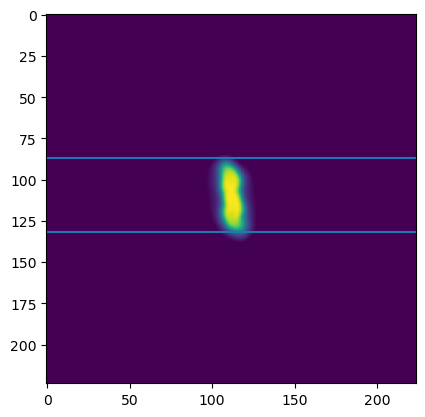

In [10]:
im = cv2.imread(matched['zoobot_bar_mask_loc'].iloc[0],  cv2.IMREAD_GRAYSCALE)
plt.imshow(im) 
plt.axhline(87)
plt.axhline(132)
# 45 pixels!

In [11]:
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)


In [12]:
def measure_bar_width_pixels(mask_loc, debug=False):
    # simplified version of
    # https://pyimagesearch.com/2016/03/28/measuring-size-of-objects-in-an-image-with-opencv/
    im = cv2.imread(mask_loc,  cv2.IMREAD_GRAYSCALE)

    im_nonzero = im[im > 0]
    thresh = np.percentile(im_nonzero.flatten(), 80)
    im_bw = cv2.threshold(im, thresh, 255, cv2.THRESH_BINARY)[1]

    # (thresh, im_bw) = cv2.threshold(im, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    cnts = cv2.findContours(im_bw, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    (cnts, _) = contours.sort_contours(cnts)
    if len(cnts) > 1:
        return np.nan
    c = cnts[0]
    box = cv2.minAreaRect(c)
    box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
    box = np.array(box, dtype="int")
    # https://stackoverflow.com/questions/29739411/what-does-cv2-cv-boxpointsrect-return
    # corners of rotated box (pixel coordinates) enclosing contour
    # x_width = box[:, 0].max() - box[:, 0].min()
    # y_width = box[:, 1].max() - box[:, 1].min()
    # box_width = np.sqrt(x_width ** 2 + y_width ** 2)

    # unpack the ordered bounding box, then compute the midpoint
	# between the top-left and top-right coordinates, followed by
	# the midpoint between bottom-left and bottom-right coordinates
    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)
    # compute the midpoint between the top-left and top-right points,
    # followed by the midpoint between the top-righ and bottom-right
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)
    # draw the midpoints on the image
    cv2.circle(im, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
    cv2.circle(im, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
    cv2.circle(im, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
    cv2.circle(im, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)

    dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
    box_width = max(dA, dB)

    if debug:
        fig, (ax1, ax0) = plt.subplots(ncols=2)
        ax0.imshow(im)
        ax1.imshow(im_bw)
        ax0.axis('off')
        ax1.axis('off')
        return box_width, fig
    else:
        return box_width

(54.51834553615875, <Figure size 640x480 with 2 Axes>)

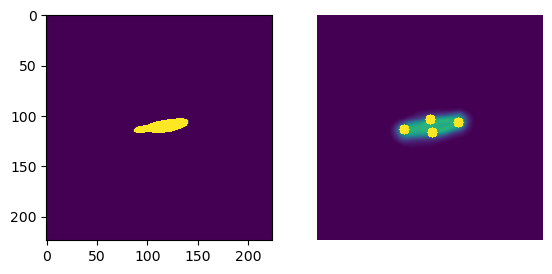

In [13]:
measure_bar_width_pixels(matched['zoobot_bar_mask_loc'].iloc[114], debug=True)

In [ ]:
matched['bar_width_pixels'] = matched['zoobot_bar_mask_loc'].apply(measure_bar_width_pixels)

In [ ]:
matched['bar_width_pixels']

0      32.190837
1      38.013156
2      20.000000
3      49.244289
4      49.368512
         ...    
135    38.000000
136    23.259407
137    39.458839
138    23.436083
139    22.141590
Name: bar_width_pixels, Length: 140, dtype: float64

In [ ]:
# matched['est_dr5_pixscale']  # arcsec/pixel
matched['bar_width_arcsec'] = matched['bar_width_pixels'] * matched['est_dr5_pixscale']

In [ ]:
nsa = pd.read_parquet('/Volumes/beta/galaxy_zoo/decals/catalogs/nsa_v1_0_1_key_cols.parquet', columns=['iauname', 'redshift'])
matched = pd.merge(nsa, matched, on='iauname')

In [ ]:
matched['angular_diameter_distance'] = cosmo.angular_diameter_distance(z=matched['redshift'])
# matched['angular_diameter_distance']

# d_A = 
# print(d_A) # 946.9318492873492 Mpc

# theta = 737.28*u.arcsec
# distance_Mpc = (theta * d_A).to(u.Mpc, u.dimensionless_angles()) # unit is Mpc only now

# print(distance_Mpc)

In [ ]:
matched['bar_width_kpc'] = matched['bar_width_arcsec'] * matched['angular_diameter_distance'] / 117
# matched['bar_width_kpc'] = matched['bar_width_arcsec'] * matched['angular_diameter_distance'] / 100

In [ ]:
matched['bar_width_kpc'] = np.array(matched['bar_width_kpc']).astype(float)

In [ ]:
from matplotlib.ticker import MaxNLocator

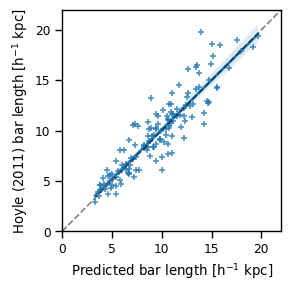

In [ ]:
sns.set_context('paper')
fig, ax = plt.subplots(figsize=(3, 3))
# plt.scatter(matched['bar_width_kpc'] , matched['length_avg'], marker='+')
sns.regplot(x=matched['bar_width_kpc'].astype(float), y=matched['length_avg'].astype(float), marker='+', robust=True, ax=ax)
ax.set_xlabel('Predicted bar length [h$^{-1}$ kpc]')
ax.set_ylabel('Hoyle (2011) bar length [h$^{-1}$ kpc]')
ax.set_xlim([0., 22.])
ax.set_ylim([0., 22.])
ax.plot([0, 22], [0, 22], color='k', alpha=0.5, linestyle='--')
ax.yaxis.set_major_locator(MaxNLocator(nbins=5, integer=True))
plt.tight_layout()
# plt.savefig('hoylebarcomparison.pdf')

In [ ]:
matched['error'] = np.abs(np.array(matched['bar_width_kpc']).astype(float) - np.array(matched['length_avg']).astype(float))
matched.sort_values('error')['error']

23     0.009274
125    0.023094
100    0.034882
102    0.058693
70     0.073180
         ...   
118    5.628094
16     5.994475
30          NaN
75          NaN
114         NaN
Name: error, Length: 140, dtype: float64